# Aircraft to XFLR Demonstration 

This IPython notebook demonstrates how to use AC2XFLR to convert your aircraft geometry into an XML file which can be imported by XFLR5. This tool can produce a planform view of your wing to verify that your geometry has been correctly enterred.

First, import the python file.

In [1]:
from AC2XFLR import *

## Wing (Includes tail surfaces)

To produce a wing, several parameters can be defined. To generate a horizontal or vertical stabiliser, also use this class.


| Parameter       | Description                                                                                                                                                                                                                | Default |
|----------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------|
| foil            | The aerofoil name. This needs to be the same as it is defined in XFLR5. This must already be loaded under the same name in XFLR under File → Direct Foil Design. A NACA foil can be defined simply with Foil → Naca Foils. | "NACA 1212" |
| angle_of_attack | The angle of attack in degrees | 0.0 |
| span            | The wingspan in metres from tip to tip. This is not a wing semi-span. | 8.0 |
| root_chord      | The chord length in metres of the wing at spanwise position y = 0. | 1.0 |
| mass            | The mass of the wing in kilograms, which is used in XFLR5's stability calculations. | 50.0 |
| shape_args      | The shape arguments dictionary. This contains unique properties to the specific planform shape. Currently only elliptical profiles are supported. See the shape_args table below. | {"shape": "ellipse", "fsmf": 0.25} |
| _type           | The type of wing. Is it a "mainwing", a "horizontal stabiliser", or "vertical stabiliser"? | "mainwing" |
| symmetric_fin   | If this is a vertical stabiliser, is it symmetrical (reflected in the vertical (z) axis)?   | False |
| double_fin      | If this is a vertical stabiliser, is it to be doubled (reflected in the y axis)?            | False |
| draw            | Do you want to see a planform plot of the wing?                                             | False |

The `shape_args` is a dictionary with completely different keys depending on the type of shape used.

| Shape | Key | Description |
|:----|:-------|:-------|
| "ellipse" | "fsmf" | The forward semi-minor axis fraction. Defines the fraction of the ellipse bounded by the tips of the leading edge, see plot below |

### Example 1: Elliptical Main Wing

C:\Users\ejduc\Engineering\AC2XFLR\AC2XFLR.py:110: RuntimeWarning: invalid value encountered in sqrt
  c_fore = K_fore*(1-(2/self.span * y)**2)**0.5
C:\Users\ejduc\Engineering\AC2XFLR\AC2XFLR.py:115: RuntimeWarning: invalid value encountered in sqrt
  c_aft = K_aft*(1-(2/self.span * y)**2)**0.5


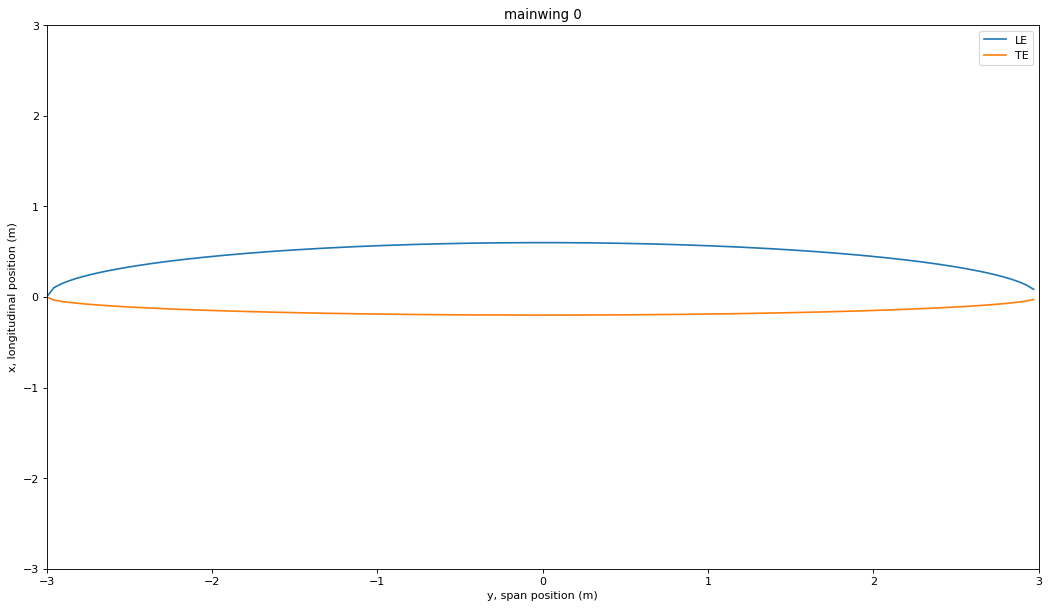

In [2]:
foil = "NACA 0012"
angle_of_attack = 15 #deg
span = 6 #m
root_chord = 0.8 #m
mass = 40 #kg
shape_args = {"shape":"ellipse", "fsmf": 0.75}
_type = "mainwing"
symmetric_fin = False
double_fin = False
draw = True
my_wing = Wing(foil, angle_of_attack, span, root_chord, mass, shape_args, _type, symmetric_fin, double_fin, draw)

If the geometry looks good, convert your wing to XML.

This XML file will be exported to a folder called "geometry" in the same directory as AC2XFLR.py

In [3]:
my_wing.wingToXML()

Successfully created file wing0.xml


The wing by itself can be imported alone onto the aircraft in the "Define" context window.

<img src="docs_source/wing_import.png">

Once imported, the 3D wing should display. Remember, if it appears flat, the foil must be created in `File → Direct Foil Design`. The wing doesn't close with fine tips because this causes errors in Reynolds number and other calculations.

<img src="docs_source/elliptical_wing.png">

## Fuselage

Supported fuselage profiles include only 4-digit NACA aerofoils rotated through 180 degrees.

In [4]:
foil = "0036" #NACA 0036
length = 10 #metres
N = 48 #number of lengthwise plotting points
my_fuselage = Fuselage(foil, length)

You can use the `checkPayloadGeo` method to see if this will contain your desired payload.

True


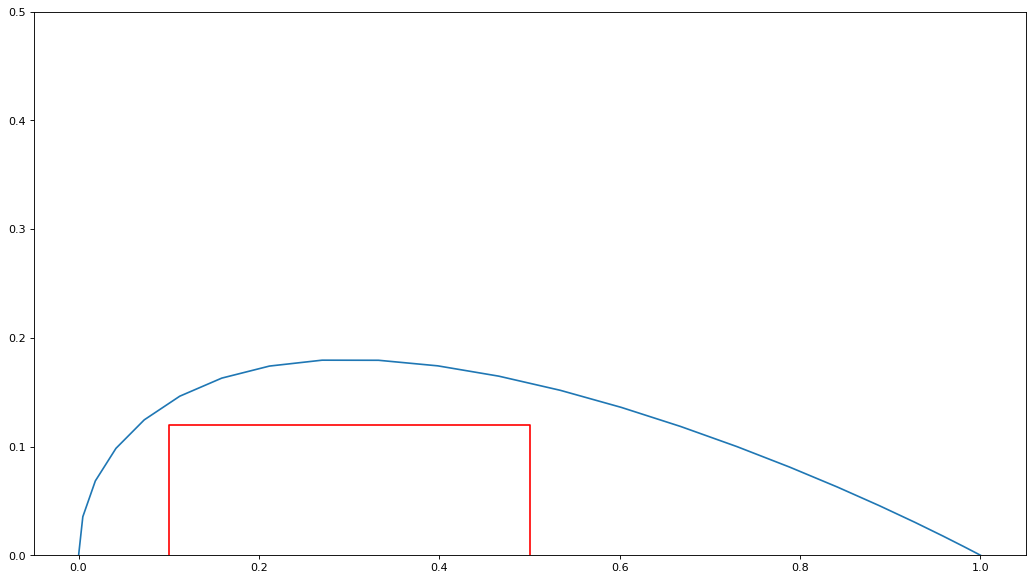

In [5]:
payload_half_length = 2 #m
payload_half_height = 1.2 #m
thickest_payload_location = 0.3 #payload is thickest at 1/3 fuselage length
top_payload_taller = True #is the top the tallest half of the payload
should_plot = True #should the payload be plotted with the fuselage profile

does_fit = my_fuselage.checkPayloadGeo(payload_half_length, payload_half_height, thickest_payload_location,
                                       top_payload_taller, should_plot)

print(does_fit)

The payload and fuselage have been scaled down to a unit fuselage length (chord length of the NACA foil).

The fuselage can then be exported to XML for importing to XFLR by invoking its `fuselageToXML` method.

In [6]:
my_fuselage.fuselageToXML()

Successfully created file Fuselage NACA 0036.xml


Remember to instanciate the foil in the direct foil design, the same way you need to for a wing.

A fuselage can be imported by enabling a body on the aircraft.

<img src="docs_source/body_check.png">

It is then imported in a similar way to the wing. You will be able to manipulate the view to be able to see the imported fuselage.

<img src="docs_source/body_import.png">